# Convolutional Layers

## Preparations

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import image

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 10,
})

from utils import *

np.set_printoptions(precision=5, suppress=True)


## Single Image Convolution

A convolution is done by multiplying a pixel’s and its neighboring pixels color value by a matrix (kernel matrix).

The convolution function is as follows, where:
* `img_in` is the image as a 2D matrix
* `kernel` is the filter kernel matrix
* `s` is the stride number

Typically, when `s=1`, the dimension should not change. This is possible if the image has been previously padded. For a `3x3` filter matrix, we need 1 layer of padding. For a `5x5` filter matrix, we will need two layes of padding. However, if the filter dimensions are even numbers, we will not be able to apply uniform padding. Check [this material](https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html) for more infomation.

In [100]:
def convolve(img_in, kernel, s):
    dim = kernel.shape
    nr, nc, = img_in.shape

    R = np.arange(0, nr - (dim[0] - s), s)
    C = np.arange(0, nc - (dim[1] - s), s)
    
    img_out = np.zeros([len(R), len(C)])

    for i, r in enumerate(R):
        for j, c in enumerate(C):
            img_out[i, j] = np.sum(kernel * img_in[r:r+dim[0], c:c+dim[1]])

    img_out = np.round(img_out / np.max(img_out) * 255.0)
    return np.int32(img_out)

## Single Image Pooling

Pooling is a downsampling technique used in convolutional neural networks (CNNs) to reduce spatial dimensions of feature maps while preserving important features. It achieves this by selecting the maximum/mean value within each small, overlapping region (or "window") of the feature map. 

In [101]:
def maxpool(img_in, dim, s):
    nr, nc, = img_in.shape

    R = np.arange(0, nr - (dim[0] - s), s)
    C = np.arange(0, nc - (dim[1] - s), s)
    
    img_out = np.zeros([len(R), len(C)])

    for i, r in enumerate(R):
        for j, c in enumerate(C):
            img_out[i, j] = np.max(img_in[r:r+dim[0], c:c+dim[1]])

    return img_out

In [102]:
def meanpool(img_in, dim, s):
    nr, nc, = img_in.shape

    R = np.arange(0, nr - (dim[0] - s), s)
    C = np.arange(0, nc - (dim[1] - s), s)
    
    img_out = np.zeros([len(R), len(C)])

    for i, r in enumerate(R):
        for j, c in enumerate(C):
            img_out[i, j] = np.mean(img_in[r:r+dim[0], c:c+dim[1]])

    return img_out

## Single Image Normalization

## Batch Convolution

In [103]:
def batch_convolve(input3d, filter3d, P, S=1):
    # Volumetric matrix is addressed by using 3 indices: [first index, second index, third index]
    # Depth is represented first index
    D, H, W = input3d.shape;
    F, _, K = filter3d.shape;
    
    # Do ZERO padding
    input3d = np.pad(input3d, ((0, 0), (P, P), (P, P)), 'constant', constant_values=((0, 0), (0, 0), (0, 0)))

    W2 = np.int32((W - F + 2 * P) / S + 1)
    H2 = np.int32((H - F + 2 * P) / S + 1)
    D2 = np.int32(K) 
   
    output3d = np.zeros((D2, W2, H2))

    for d in range(D):
        input = input3d[d, :, :]
        for d2 in range(D2):
            output3d[d2, :, :] = output3d[d2, :, :] + convolve(input, kernel=filter3d[d2, :, :], s=S)

    return output3d

## Batch Pooling

## Batch Normalization

----

## Demonstrations

For the demonstration, we will load a colored image (3 channels). We will first need to re-arrange the image matrix such that it is in the desired format, which is: `[Depth x Width x Height]`.

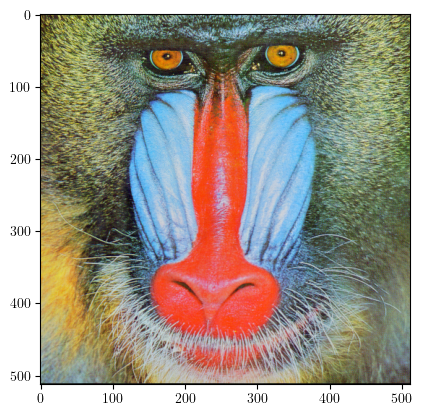

In [104]:
%matplotlib inline

baboon = image.imread('./baboon.png')
plt.imshow(baboon)
plt.show()

Convert to `[Depth x Width x Height]` and show the images separately.

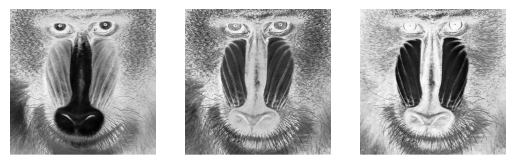

In [105]:
%matplotlib inline

baboon = np.array( [baboon[:, :, 0],
                    baboon[:, :, 1],
                    baboon[:, :, 2]])

for i in range(3):
    output = baboon[i,:,:]
    plt.subplot(1, 3, i+1)
    # Rescale the weights to be between 0 and 255
    plt.imshow(output, cmap='Greys')
    plt.axis('off')

Let's apply 3 arbitrary filters.

In [106]:
F = np.array([[[-2, -1,  0],
               [-1,  1,  1],
               [ 0,  1,  2]],
              [[ 1,  0,  1],
               [ 2,  0, -2],
               [ 1,  0, -1]],
              [[0.0625, 0.125, 0.0625],
               [0.125, 0.25, 0.125],
               [0.0625, 0.125, 0.0625]],
             ])

output = batch_convolve(baboon, F, 1)

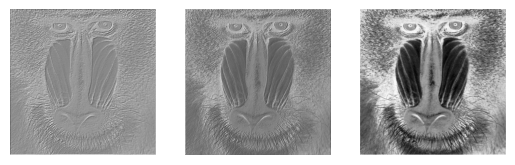

In [107]:
for i in range(3):
    output_ = output[i,:,:]
    plt.subplot(1, 3, i+1)
    # Rescale the weights to be between 0 and 255
    plt.imshow(output_, cmap='Greys')
    plt.axis('off')